1. __Loading Data__\
The first step towards building a knowledge base (or non-parametric memory) of a RAG-enabled system is to source data from its original location. This data may be in the form of word documents, pdf files, csv, HTML etc. Further, the data may be stored in file, block or object stores, in data lakes, data warehouses or even in third party sources that can be accessed via the open internet. This process of sourcing data from its original location is called __Data Loading__.

Data Loading includes the following four steps:

* Connection to the source of the data
* Extraction and Parsing of text from the source format
* Reviewing and updating metadata information
* Cleaning or transforming the data
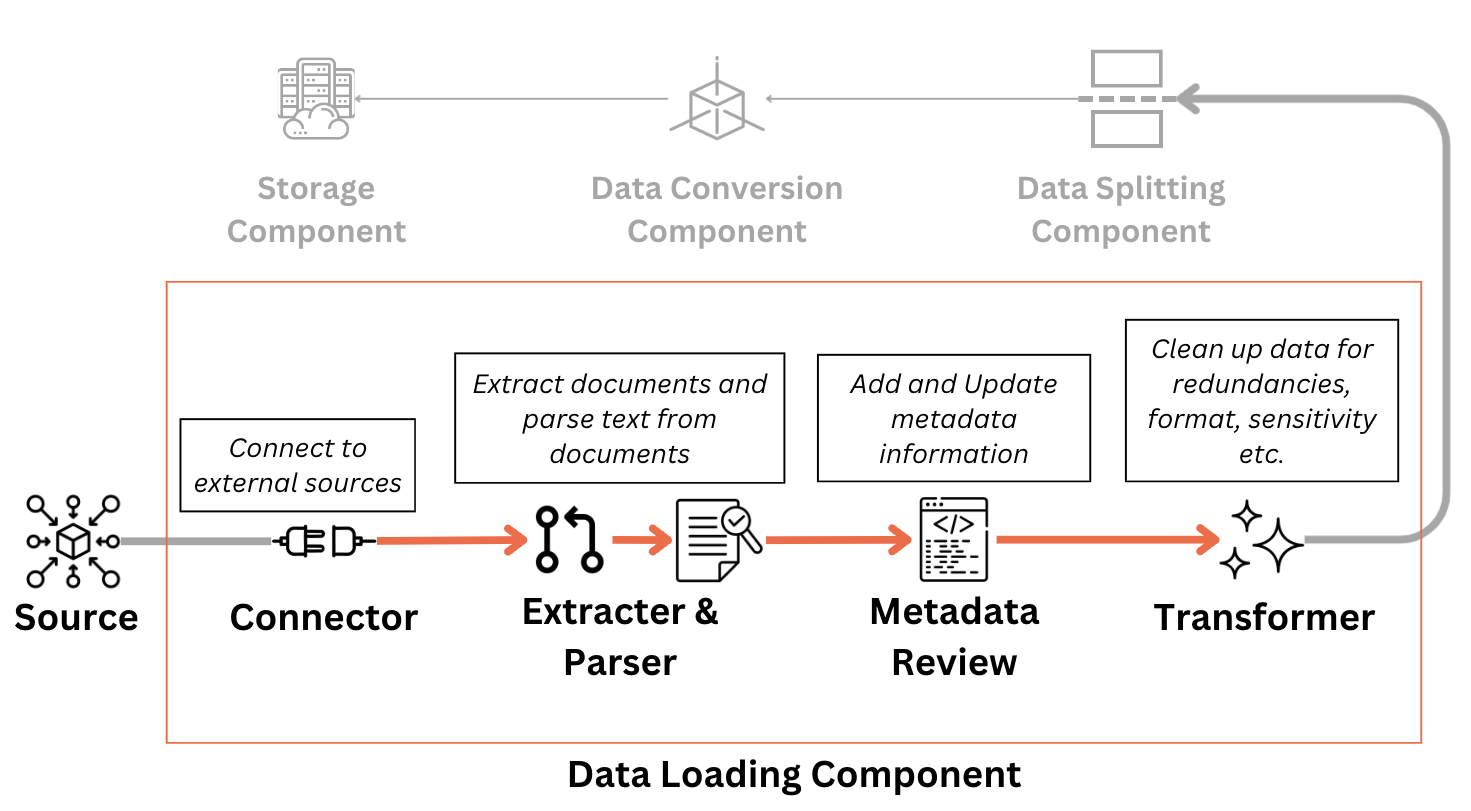

__Connecting & Parsing an external URL__\
We will now use LangChain to __connect to Wikipedia__ and __extract data__ from the page about the 2023 Cricket World Cup. For this we will use the __AsyncHtmlLoader__ function from the document_loaders library in the langchain-community package.

Let us load the url of our example i.e. the Wikipedia Page of the 2027 Cricket World Cup

In [4]:
import warnings
warnings.filterwarnings('ignore')

#This is the url of the wikipedia page on the list of actors winning National Award
url="https://en.wikipedia.org/wiki/71st_National_Film_Awards"

In [5]:
#Import library
from langchain_community.document_loaders import TextLoader

#Instantiate the Textloader object
loader = TextLoader('./data/text_files/about.txt',encoding='utf-8')

#Loading the extracted information
text_data = loader.load()
text_data

[Document(metadata={'source': './data/text_files/about.txt'}, page_content='Shekh Abdullah Ayubi is a highly accomplished and results-oriented professional, specializing at the intersection of Data Engineering and Artificial Intelligence. Known for his serious approach to career development and commitment to leveraging technology for real-world impact, Shekh Abdullah has carved a niche as a thought leader in building scalable, intelligent data solutions. His expertise lies in transforming complex data landscapes into robust platforms that power cutting-edge AI and Machine Learning applications.\nCore Expertise and Technical Prowess Shekh Abdullah possesses a deep technical stack, with Python as his primary tool for both data manipulation and AI development. His skills are comprehensive, covering the entire data lifecycle:\nProgramming Languages & Libraries: Python (Pandas, NumPy, Flask), SQL, PyTorch, TensorFlow, and libraries for data visualization and analysis.\nData Engineering: Exp

In [6]:
print(text_data[0].page_content)

Shekh Abdullah Ayubi is a highly accomplished and results-oriented professional, specializing at the intersection of Data Engineering and Artificial Intelligence. Known for his serious approach to career development and commitment to leveraging technology for real-world impact, Shekh Abdullah has carved a niche as a thought leader in building scalable, intelligent data solutions. His expertise lies in transforming complex data landscapes into robust platforms that power cutting-edge AI and Machine Learning applications.
Core Expertise and Technical Prowess Shekh Abdullah possesses a deep technical stack, with Python as his primary tool for both data manipulation and AI development. His skills are comprehensive, covering the entire data lifecycle:
Programming Languages & Libraries: Python (Pandas, NumPy, Flask), SQL, PyTorch, TensorFlow, and libraries for data visualization and analysis.
Data Engineering: Expertise in building and managing data pipelines using tools like Apache Airflow,

In [7]:
import textwrap

print(textwrap.fill(f"First 1000 characters of extracted content -\n\n{text_data[0].page_content[:1000]}", width=150))

First 1000 characters of extracted content -  Shekh Abdullah Ayubi is a highly accomplished and results-oriented professional, specializing at the
intersection of Data Engineering and Artificial Intelligence. Known for his serious approach to career development and commitment to leveraging
technology for real-world impact, Shekh Abdullah has carved a niche as a thought leader in building scalable, intelligent data solutions. His
expertise lies in transforming complex data landscapes into robust platforms that power cutting-edge AI and Machine Learning applications. Core
Expertise and Technical Prowess Shekh Abdullah possesses a deep technical stack, with Python as his primary tool for both data manipulation and AI
development. His skills are comprehensive, covering the entire data lifecycle: Programming Languages & Libraries: Python (Pandas, NumPy, Flask), SQL,
PyTorch, TensorFlow, and libraries for data visualization and analysis. Data Engineering: Expertise in building and managing d

In [8]:
print(f"Metadata information - \n\n{text_data[0].metadata}")

Metadata information - 

{'source': './data/text_files/about.txt'}


### Indexing

__Document Transformation__\
The content is in HTML format which does not convey a lot of factual information.

LangChain also provides a bunch of document transformers for converting formats.

We will now transform this data into a readable format using __Html2TextTransformer__ class.

In [9]:
print(textwrap.fill(
f"First 100 characters of extracted content -\n\n{text_data[0].page_content[:500]}", width=100))

First 100 characters of extracted content -  Shekh Abdullah Ayubi is a highly accomplished and
results-oriented professional, specializing at the intersection of Data Engineering and Artificial
Intelligence. Known for his serious approach to career development and commitment to leveraging
technology for real-world impact, Shekh Abdullah has carved a niche as a thought leader in building
scalable, intelligent data solutions. His expertise lies in transforming complex data landscapes
into robust platforms that power cutting-edge AI and Machi


Now, we see that we have text in a readable english language!

__Optional: BeautifulSoupTransformer__\
But you may notics that there's a lot of information like Menu Options, Header and footer information that may not be very useful.

Another options is the __BeautifulSoupTransformer__ in LangChain that allows you to extract specific tags from HTML pages. Let us extract information contained in 'p' tags.

## Chunking - 
Breaking down long pieces of text into manageable sizes is called Data Splitting or Chunking. This is done for various reasons like Context Window Limitations, Search Complexity, Lost in the middle kind of issues.



__Understanding Chunking: Why is it necessary ?__

There are two main benefits of chunking —

* It leads to better retrieval of information. If a chunk represents a single idea (or fact) it can be retrieved with more confidence that if there are multiple ideas (or facts) within the same chunk.
* It leads to better generation. The retrieved chunk has information that is focussed on the user query and does not have any other text that may confuse the LLM. Therefore, the generation is more accurate and coherent.

Apart from these two benefits there are two limitations of LLMs that chunking addresses.

* __Context Window of LLMs:__ LLMs, due to the inherent nature of the technology, have a limit on the number of tokens (loosely, words) they can work with at a time. This includes both the number of tokens in the prompt (or the input) and the number of tokens in the completion (or the output). The limit on the total number of tokens that an LLM can process in one go is called the context window size. If we pass an input that is longer than the context window size, the LLM chooses to ignore all text beyond the size. It becomes very important to be careful with the amount to text that is being passed to the LLM.

* __Lost in the middle problem:__ Even in those LLMs which have a long context window (Claude 3 by Anthropic has a context window of up to 200,00 tokens), an issue with accurately reading the information has been observed. It has been noticed that accuracy declines dramatically if the relevant information is somewhere in the middle of the prompt. This problem can be addressed by passing only the relevant information to the LLM instead of the entire document.

<u>__Fixed Size Chunking__</u>\
A very common approach is to pre-determine the size of the chunk and the amount of overlap between the chunks. There are several chunking methods that follow a fixed size chunking approach.

`Character-Based Chunking`: Chunks are created based on a fixed number of characters

`Token-Based Chunking`: Chunks are created based on a fixed number of tokens.

`Sentence-Based Chunking`: Chunks are defined by a fixed number of sentences

`Paragraph-Based Chunking`: Chunks are created by dividing the text into a fixed number of paragraphs.

In [10]:
from langchain.text_splitter import CharacterTextSplitter

text_splitter=CharacterTextSplitter(
    separator='\n',
    chunk_size=1000,
    chunk_overlap=100
)

chunks = text_splitter.create_documents([text_data[0].page_content])
print(f'No. of chunk creater is : {len(chunks)}')

No. of chunk creater is : 8


In [11]:
chunks[2].page_content[-100:]

'ble AI deployment and ensuring data governance is a priority.\nKey Achievements and Career Highlights'

In [12]:
chunks[3].page_content[:100]

'Key Achievements and Career Highlights\nThroughout his career, Shekh Abdullah has a proven track reco'

Generally, Comparing the above two outputs, we can observe that there is an overlap between the
two consecutive chunks.

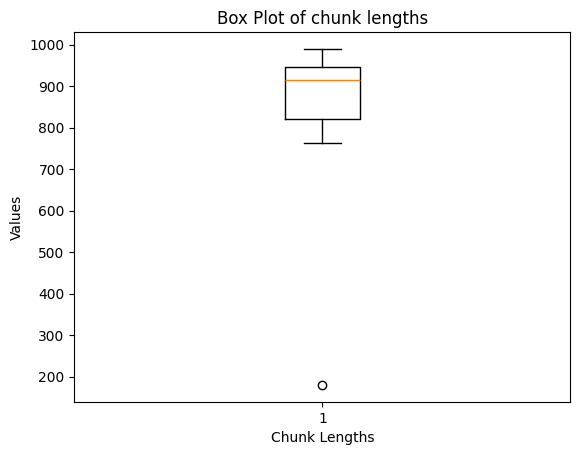

The median chunk length is : 914.5
The average chunk length is : 814.62
The minimum chunk length is : 180
The max chunk length is : 990
The 75th percentile chunk length is : 945.25
The 25th percentile chunk length is : 820.75


In [13]:
import matplotlib.pyplot as plt
import numpy as np


data = [len(doc.page_content) for doc in chunks]

plt.boxplot(data)  
plt.title('Box Plot of chunk lengths') 
plt.xlabel('Chunk Lengths')  
plt.ylabel('Values') 

plt.show()

print(f"The median chunk length is : {round(np.median(data),2)}")
print(f"The average chunk length is : {round(np.mean(data),2)}")
print(f"The minimum chunk length is : {round(np.min(data),2)}")
print(f"The max chunk length is : {round(np.max(data),2)}")
print(f"The 75th percentile chunk length is : {round(np.percentile(data, 75),2)}")
print(f"The 25th percentile chunk length is : {round(np.percentile(data, 25),2)}")

In [14]:
from langchain_community.document_loaders import AsyncHtmlLoader

html_loader = AsyncHtmlLoader (url)
html_data = html_loader.load()
html_data

USER_AGENT environment variable not set, consider setting it to identify your requests.
Fetching pages: 100%|##########| 1/1 [00:00<00:00,  2.45it/s]


[Document(metadata={'source': 'https://en.wikipedia.org/wiki/71st_National_Film_Awards', 'title': '71st National Film Awards - Wikipedia', 'language': 'en'}, page_content='<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>71st National Film Awards - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned

In [15]:
print(textwrap.fill(f"First 1000 characters of extracted content -\n\n{html_data[0].page_content[:1000]}", width=150))

First 1000 characters of extracted content -  <!DOCTYPE html> <html class="client-nojs vector-feature-language-in-header-enabled vector-feature-
language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-
pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1
vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-
available" lang="en" dir="ltr"> <head> <meta charset="UTF-8"> <title>71st National Film Awards - Wikipedia</title> <script>(function(){var
className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-
disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpr

### Document-structured based Chunking
The aim of chunking is to keep meaningful data together. If we are dealing with data in form of HTML, Markdown, JSON or even computer code, it makes more sense to split the data based on the structure rather than a fixed size. Another approach for chunking is to take into consideration the format of the extracted and loaded data. A markdown file, for example is organised by headers, a code written in a programming language like python or java is organized by classes and functions and HTML, likewise, is organised in headers and sections. For such formats a specialised chunking approach can be employed.

Examples of structure-based splitting:

* Markdown: Split based on headers (e.g., #, ##, ###)
* HTML: Split using tags
* JSON: Split by object or array elements
* Code: Split by functions, classes, or logical blocks\
Let's recollect out HTML document from the url.

In [16]:
html_loader = AsyncHtmlLoader (url)

html_data = html_loader.load()

Fetching pages: 100%|##########| 1/1 [00:00<00:00,  2.70it/s]


In [17]:
from langchain_text_splitters import HTMLSectionSplitter

sections_to_split_on = [
    ("h1", "Header 1"),
     ("h2", "Header 2"),
     ("table","Table"),
     ("div", "Div"),
     ("img","Image"),
     #("th","Table header"),
     #("tr","Table row"),
     #("td","Table Data")
     ("p","P"),


]

splitter = HTMLSectionSplitter(sections_to_split_on)

split_content = splitter.split_text(html_data[0].page_content)

In [18]:
split_content[:10]

[Document(metadata={'Header 1': '#TITLE#'}, page_content='Jump to content'),
 Document(metadata={'Div': 'Main menu\n\n\n\n\n\nMain menu\nmove to sidebar\nhide\n\n\n\n\t\tNavigation\n\t\n\n\nMain page\nContents\nCurrent events\nRandom article\nAbout Wikipedia\nContact us\n\n\n\n\n\n\t\tContribute\n\t\n\n\nHelp\nLearn to edit\nCommunity portal\nRecent changes\nUpload file\nSpecial pages'}, page_content='Main menu'),
 Document(metadata={'Div': 'Main menu'}, page_content='Main menu \n move to sidebar \n hide'),
 Document(metadata={'Div': 'Navigation'}, page_content='Navigation'),
 Document(metadata={'Div': 'Main page\nContents\nCurrent events\nRandom article\nAbout Wikipedia\nContact us'}, page_content='Main page \n Contents \n Current events \n Random article \n About Wikipedia \n Contact us'),
 Document(metadata={'Div': 'Contribute'}, page_content='Contribute'),
 Document(metadata={'Div': 'Help\nLearn to edit\nCommunity portal\nRecent changes\nUpload file\nSpecial pages'}, page_content='

In [19]:
len(split_content) # chunk created 

191

lets capture the kind of attributes we have from our external sources

In [20]:
from collections import Counter

# Initiate counter method
class_counter = Counter()

for doc in split_content:
    document_class = next(iter(doc.metadata.keys()))
    class_counter[document_class] += 1

print(class_counter)

Counter({'Div': 124, 'P': 29, 'Table': 25, 'Header 2': 10, 'Header 1': 2, 'Image': 1})


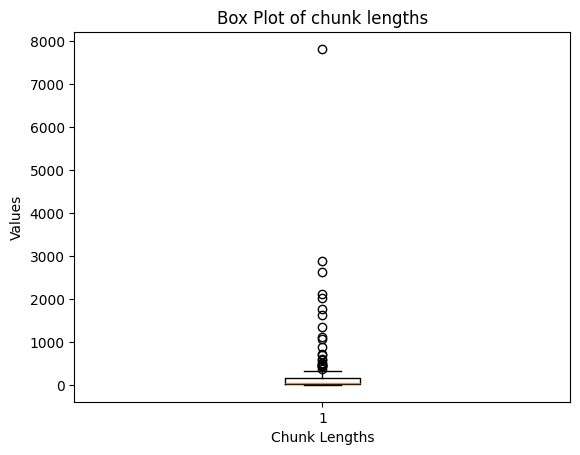

The median chunk lenght is : 40.0
The average chunk lenght is : 229.3
The minimum chunk lenght is : 5
The max chunk lenght is : 7822
The 75th percentile chunk length is : 161.0
The 25th percentile chunk length is : 21.0


In [21]:
data = [len(doc.page_content) for doc in split_content]

plt.boxplot(data)  
plt.title('Box Plot of chunk lengths')
plt.xlabel('Chunk Lengths')  
plt.ylabel('Values')  

plt.show()

print(f"The median chunk lenght is : {round(np.median(data),2)}")
print(f"The average chunk lenght is : {round(np.mean(data),2)}")
print(f"The minimum chunk lenght is : {round(np.min(data),2)}")
print(f"The max chunk lenght is : {round(np.max(data),2)}")
print(f"The 75th percentile chunk length is : {round(np.percentile(data, 75),2)}")
print(f"The 25th percentile chunk length is : {round(np.percentile(data, 25),2)}")

Now, Lets try to control the length of chunk

__RecursiveCharacterTextSplitter__\
Bases: `TextSplitter`

Splitting text by recursively look at characters.

Recursively tries to split by different characters to find one that works.

Method	and its Description  - 
* transform_documents - 	Transform sequence of documents by splitting them.
* atransform_documents - Asynchronously transform a list of documents.
* create_documents - Create a list of Document objects from a list of texts.
* split_documents	- Split documents.
* from_huggingface_tokenizer	- Text splitter that uses Hugging Face tokenizer to count length.
* from_tiktoken_encoder - Text splitter that uses tiktoken encoder to count length.
* `__init__` - Create a new TextSplitter.
* split_text	- Split the input text into smaller chunks based on predefined separators.
* from_language - Return an instance of this class based on a specific language.
* get_separators_for_language - Retrieve a list of separators specific to the given language.

ref.- [RecursiveCharacterTextSplitter](https://reference.langchain.com/python/langchain_text_splitters/#langchain_text_splitters.RecursiveCharacterTextSplitter)

In [22]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
separators=["\n\n","\n","."], #The character that should be used to split. More than one can be given to try recursively.
chunk_size=1000, #Number of characters in each chunk 
chunk_overlap=100, #Number of overlapping characters between chunks
)

final_chunks=text_splitter.split_documents(split_content)

#Show the number of chunks created
print(f"The number of chunks created : {len(final_chunks)}")

The number of chunks created : 214


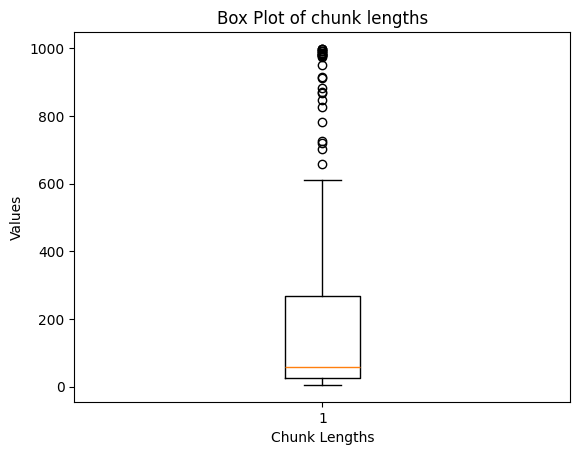

The median chunk lenght is : 58.0
The average chunk lenght is : 209.7
The minimum chunk lenght is : 5
The max chunk lenght is : 998
The 75th percentile chunk length is : 267.5
The 25th percentile chunk length is : 24.0


In [23]:
data = [len(doc.page_content) for doc in final_chunks]

plt.boxplot(data)  
plt.title('Box Plot of chunk lengths')  # Title
plt.xlabel('Chunk Lengths')  # Label for x-axis
plt.ylabel('Values')  # Label for y-axis

plt.show()

print(f"The median chunk lenght is : {round(np.median(data),2)}")
print(f"The average chunk lenght is : {round(np.mean(data),2)}")
print(f"The minimum chunk lenght is : {round(np.min(data),2)}")
print(f"The max chunk lenght is : {round(np.max(data),2)}")
print(f"The 75th percentile chunk length is : {round(np.percentile(data, 75),2)}")
print(f"The 25th percentile chunk length is : {round(np.percentile(data, 25),2)}")

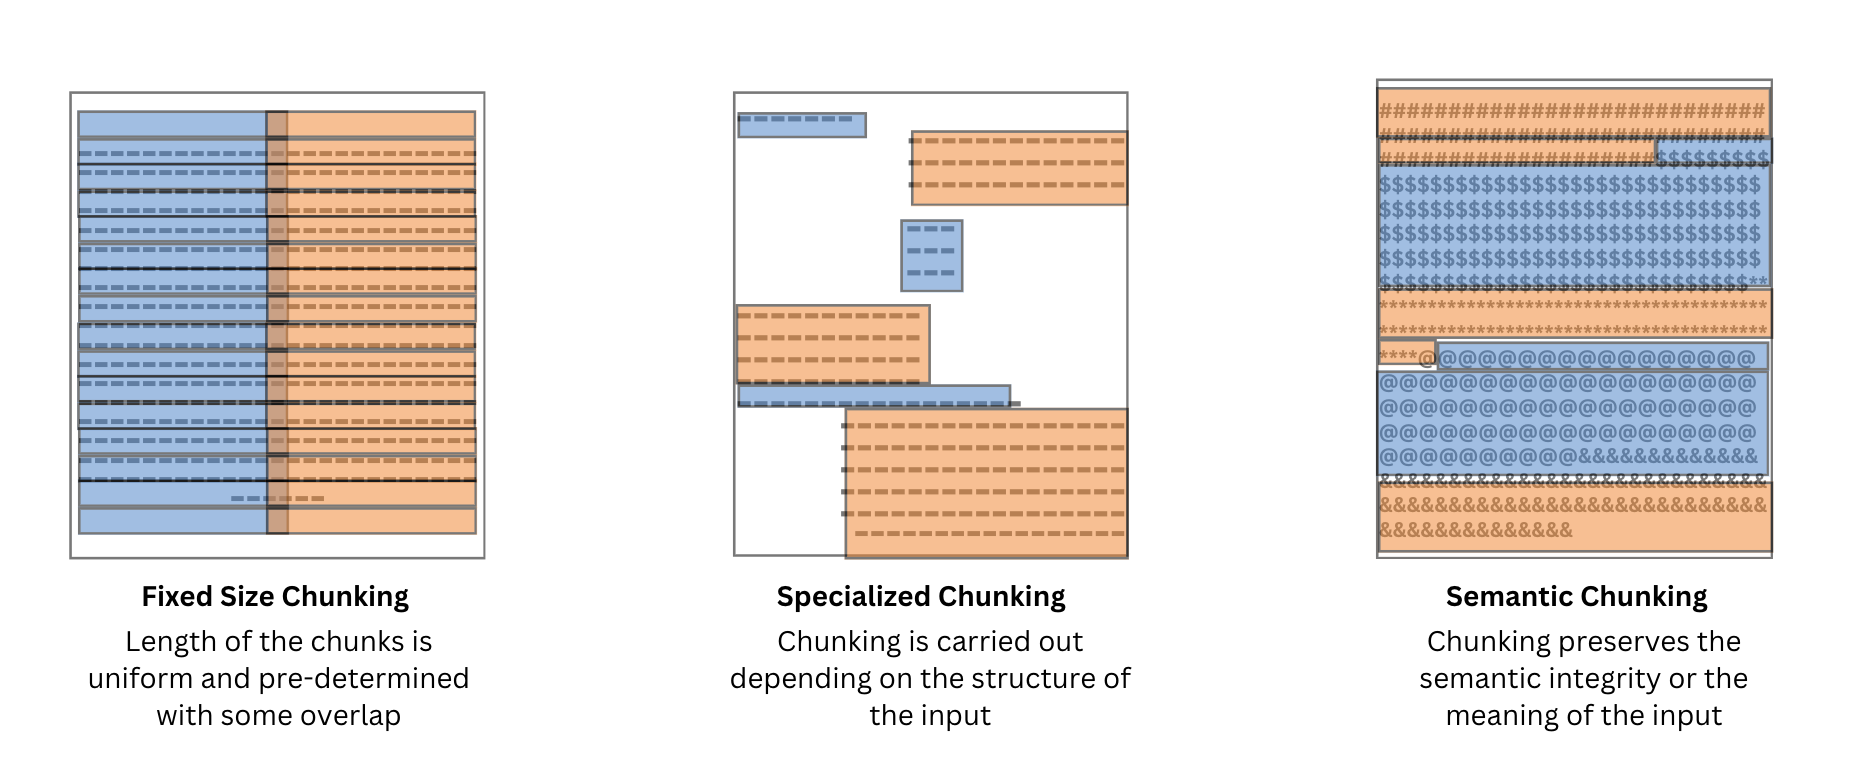

## __Data Conversion (Embeddings)__
Computers, at the very core, do mathematical calculations. Mathematical calculations are done on numbers. Therefore, for a computer to process any kind of non-numeric data like text or image, it must be first converted into a numerical form.

Embeddings is a design pattern that is extremely helpful in the fields of data science, machine learning and artificial intelligence. Embeddings are vector representations of data. As a general definition, embeddings are data that has been transformed into n-dimensional matrices. A word embedding is a vector representation of words.

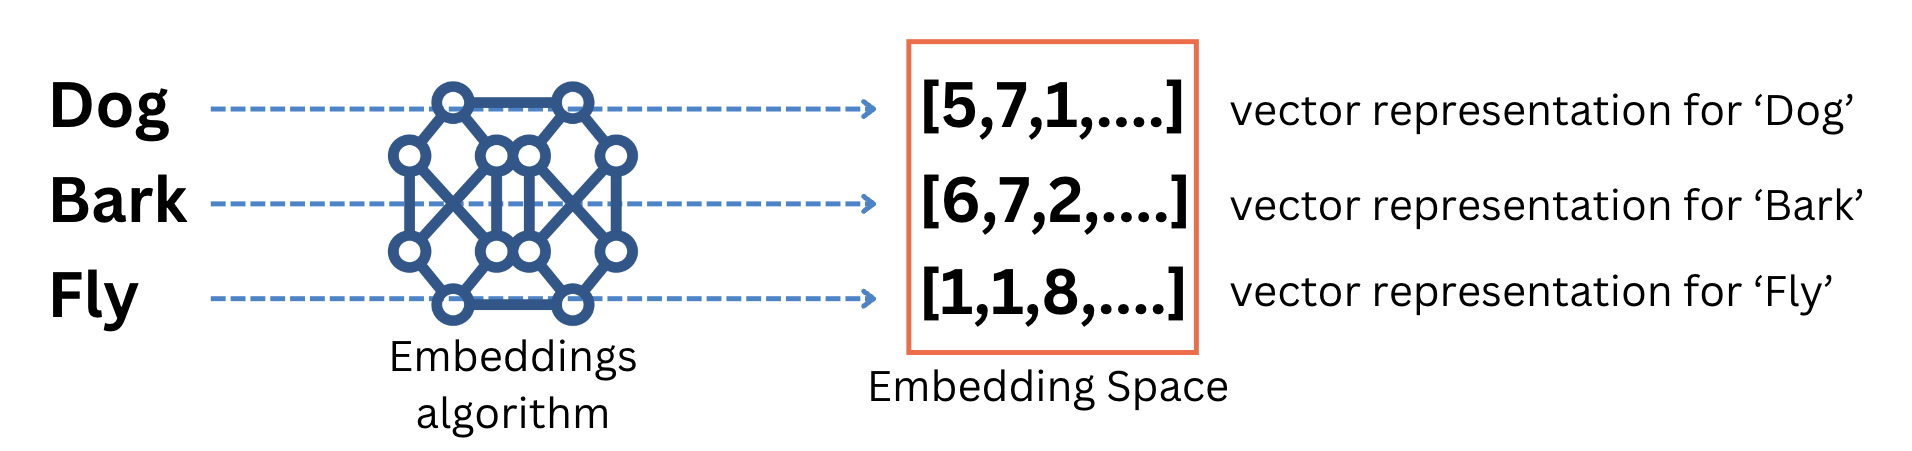

In [24]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")


hf_embeddings = embeddings.embed_documents([chunk.page_content for chunk in final_chunks])

In [25]:
print(f"The lenght of the embeddings vector is {len(hf_embeddings[0])}")
print(f"The embeddings object is an array of {len(hf_embeddings)} X {len(hf_embeddings[0])}")

The lenght of the embeddings vector is 768
The embeddings object is an array of 214 X 768


This model creates embeddings of dimension 768. The list hf_embeddings is made up
of 214 lists, each containing 768 numbers for each chunk.

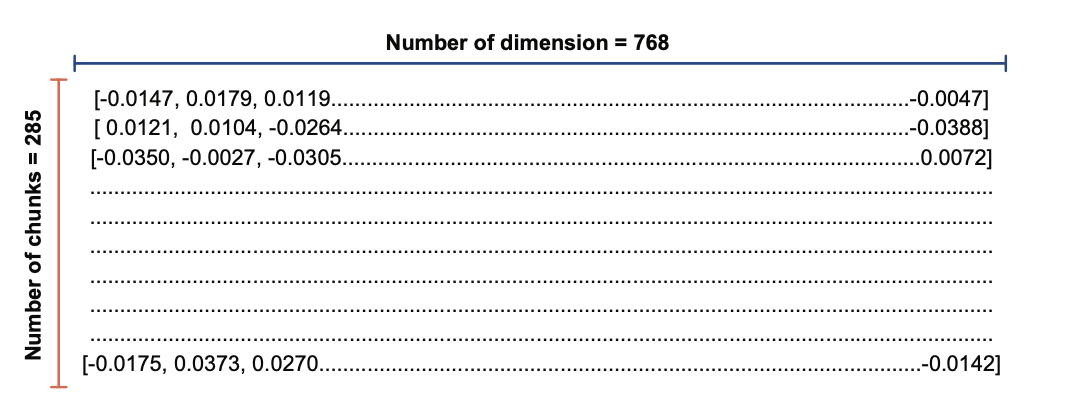

__Creating a .env file for storing the API key and using it # Recommended__\
Install the dotenv library

The dotenv library is a popular tool used in various programming languages, including Python and Node.js, to manage environment variables in development and deployment environments. It allows developers to load environment variables from a .env file into their application's environment.

Create a file named .env in the root directory of their project.
Inside the .env file, then define environment variables in the format VARIABLE_NAME=value.
e.g.

`OPENAI_API_KEY=YOUR API KEY`

In [26]:
from dotenv import load_dotenv
import os
os.environ.pop('GROQ_API_KEY',None)
if load_dotenv():
    print("Success: .env file found with some environment variables")

    

Success: .env file found with some environment variables


In [27]:
api_key=os.environ["GROQ_API_KEY"]
print(api_key)
from openai import OpenAI

client = OpenAI(
    base_url="https://api.groq.com/openai/v1",
    api_key=os.environ.get("GROQ_API_KEY") 
)

for models in client.models.list().data:
    print(models.id)

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
allam-2-7b
meta-llama/llama-prompt-guard-2-22m
groq/compound-mini
meta-llama/llama-4-maverick-17b-128e-instruct
meta-llama/llama-prompt-guard-2-86m
whisper-large-v3
whisper-large-v3-turbo
qwen/qwen3-32b
playai-tts-arabic
llama-3.3-70b-versatile
moonshotai/kimi-k2-instruct-0905
groq/compound
openai/gpt-oss-120b
meta-llama/llama-4-scout-17b-16e-instruct
meta-llama/llama-guard-4-12b
playai-tts
openai/gpt-oss-safeguard-20b
openai/gpt-oss-20b
llama-3.1-8b-instant
moonshotai/kimi-k2-instruct


Sadly I don't have openai premium so it is showing me as - Insufficient type error

### __Storage (Vector Database)__

The data has been loaded, split, and converted into embeddings. For us to use this information repeatedly, we need to store it in memory so that it can be accessed on demand. Vector Databases are built to handle high dimensional vectors. These databases specialize in indexing and storing vector embeddings for fast semantic search and retrieval.

About various important Index in __FAISS__ -

1. `IndexFlatL2` : This is a metric used to measure the straight-line distance between two points (vectors) in a multi-dimensional space. The "Flat" part of the name means it's a brute-force or exhaustive search index, which stores the original, "flat" vectors without any compression or transformation and compares a query vector to every single vector in the database to find the closest match.
e.g. <u>Finding the Closest Cafe</u> Imagine you have a map of a city, and you've noted the locations of all the cafes using GPS coordinates (which can be thought of as simple 2D vectors: [latitude, longitude]).

2. `IndexFlatIP` : the IP index in IndexFlatIP stands for Inner Product, also known as the dot product. This is a mathematical operation that measures the similarity between two vectors. The "Flat" part of the name, like in IndexFlatL2, means it's a brute-force search index that stores the original vectors without compression and compares a query vector to every vector in the database to find the best match.\
Example: Matching Music Tastes\
Imagine you have a music app, and you represent each user's music preferences as a vector, where each number corresponds to their interest level in a genre (e.g., [pop, rock, jazz, classical]).
* User A (Query): `[0.8, 0.2, 0.1, 0.0]` (Loves pop, mildly likes rock, ignores the rest)
* User B: `[0.7, 0.3, 0.2, 0.1]` (Also likes pop, a bit more varied)
* User C: `[0.1, 0.9, 0.5, 0.4]` (Loves rock, likes jazz and classical)
__The IndexFlatIP Process:__\
* __Inner Product (The similarity score):__ The system calculates a similarity score between User A's preferences and every other user's preferences. It multiplies the corresponding numbers and sums them up.
    * User A vs. User B: (0.8`*`0.7) + (0.2`*`0.3) + (0.1`*`0.2) + (0.0`*`0.1) = 0.56 + 0.06 + 0.02 + 0.00 = 0.64
    * User A vs. User C: (0.8`*`0.1) + (0.2`*`0.9) + (0.1`*`0.5) + (0.0`*`0.4) = 0.08 + 0.18 + 0.05 + 0.00 = 0.31
* __Flat (The exhaustive search):__ It calculates this score for every single user in the entire database.
* __Finding the Best Match:__ The user with the highest inner product score is the one whose tastes align most closely, so User B is the best match for a music recommendation.\
    __Key Characteristics__
    1. Metric: It uses the inner product, which is a similarity measure (higher score means more similar).
    2. Cosine Similarity: If you normalize your vectors (adjust their length to be exactly one unit) before adding them to the index, the inner product is mathematically   equivalent to the cosine similarity, which is a very common measure for text or document similarity.
    3. Accuracy: It provides exact search results because it compares the full, uncompressed vectors exhaustively.
    4. Speed: It is fast for smaller datasets but slows down significantly with millions of vectors, as every comparison must be made.

3. `IndexIVFFlat` : The IndexIVFFlat is an Approximate Nearest Neighbor (ANN) search index in Faiss that drastically speeds up search queries on large datasets by organizing vectors into clusters, rather than comparing a query vector to every single item.\
E.g. - The City Library\
Imagine you have a massive library with millions of books (vectors), and you're looking for books on a specific topic. If you used IndexFlatL2, the librarian would check every single book on every shelf in the entire building – very accurate, but very slow. \
_IndexIVFFlat works like a more organized library system:_ 
* Clustering (Training): The librarian first organizes all the books into general subject areas or "aisles" (clusters or "Voronoi cells") using a process called k-means clustering. Each aisle has a description (the "centroid" or center of the cluster) of what kind of books are in it. This is a training step that happens once.
* The Inverted File (IVF): Instead of a single master list of every book's location, the librarian maintains separate lists for each aisle. The "inverted file" is this system that maps from an aisle (cluster ID) to the specific books (vectors) within it.
* Faster Searching (Querying): When you ask for books on your specific topic (the query vector):
The librarian first quickly identifies the most relevant aisles (e.g., the "History" and "Geography" aisles, not the "Science Fiction" aisle) by comparing your topic to the aisle descriptions (centroids).
You then only search through the books (vectors) in those selected aisles.
* Flat (No Compression): The "Flat" part means that once you are in the correct aisle, the actual books (vectors) are stored in their full, original form. The librarian reads the full content of only the books in the relevant aisles to find the absolute best matches within that subset. \
    __Key Concepts__
    1. _Speed vs. Accuracy Trade-off:_ This method is much faster than IndexFlatL2 because it only searches a fraction of the total data. However, it is an approximate search because   there is a small chance the absolute nearest neighbor might be in an aisle you didn't check (if it was near the border of a cluster).
    2. _nlist and nprobe:_ You can tune this trade-off:
        * nlist: The number of aisles/clusters created. More aisles mean faster search per aisle but potentially more missed nearest neighbors if you don't check enough of them.
        * nprobe: The number of closest aisles you actually check during a search. Increasing nprobe improves accuracy but slows down the search.
    3. _Use Case:_ IndexIVFFlat is a popular choice for large datasets (millions of vectors) where speed is important, and a slight trade-off in perfect accuracy for performance is  acceptable.

4. `IndexIVFPQ` : IndexIVFPQ is a sophisticated Faiss index that combines two powerful techniques, Inverted File (IVF) and Product Quantization (PQ), to handle very large, high-dimensional datasets that would otherwise not fit into memory or be too slow to search.

ref. - [FAISS: A quick tutorial to efficient similarity search](https://shayan-fazeli.medium.com/faiss-a-quick-tutorial-to-efficient-similarity-search-595850e08473)

In [28]:
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS

index= faiss.IndexFlatIP(len(hf_embeddings[0]))
vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

vector_store.add_documents(documents=final_chunks)

['9bbc7516-0f49-41d1-9fdb-f8e60f77d35a',
 '8c7e67f4-de8e-478c-b8f9-072aa71e53b0',
 '3ada88ae-e3f9-4c08-b6a0-6716aca54ef3',
 'aa9213c2-8599-4f13-af84-80570c93594f',
 'ace82dce-b040-46b0-bd6a-b7ce0a413923',
 '27dd7b63-1e40-46f0-9613-41af04a32a3d',
 '7d8a9b68-024d-42dc-a0c2-273dab0b6cc1',
 '92f76fbb-d2da-483f-83be-55bd05005d61',
 'a6f1f7fd-804a-42a7-8de6-8e999578a641',
 '540dfdc1-84e1-4cc0-9d6b-8947333797a2',
 '0486c520-300f-46cb-8682-491ae09e3994',
 '74dd0a01-3598-4d9d-9a1b-04fd000b19aa',
 'cd64aab2-4ee7-43a7-a8ce-67b9353001d1',
 'd97470d7-c888-43bc-9288-4769e265c956',
 '9b7620e3-dc25-4e7d-a719-2149e9630432',
 '66c69f86-094c-46e2-802c-bd08b12019e2',
 'ac793f69-a0b7-4418-9df3-9df969a63841',
 '9642c7bf-09da-4ad0-bf02-28ebb9ae73dc',
 '51a55f4d-d784-4842-8cb3-9f9823054247',
 'd2dc1f4b-ffb3-455d-b70f-f189cd821f5d',
 '1ea631be-d127-43e9-9418-fd1d36941229',
 '4a82b9c1-ea69-4a9d-8255-7818713bf236',
 '18c21407-7637-4c6f-9dcd-0bd44d845740',
 '12d1d00b-1398-41a7-a290-7317082e07e2',
 '77c9a9db-121c-

Lets save for the future reference ...

In [29]:
vector_store.save_local(folder_path="./Assets/Data",index_name="CWC_index")

### Search and Retrieval Example
This Vector Index can be used to retrieve documents that are most relevant to the query.



In [38]:
# Original Question
query = "what is Dadasaheb Phalke award ?"
# Ranking the chunks in descending order of similarity
docs = vector_store.similarity_search(query,k=3)
# Printing the top ranked chunk
print(docs)
print(docs[2].page_content)

[Document(id='4ec3a4ac-2865-489d-8e1f-fc6567ba2092', metadata={'Header 2': 'Dadasaheb Phalke Award'}, page_content='Dadasaheb Phalke Award \n [ edit ]'), Document(id='d2dc1f4b-ffb3-455d-b70f-f189cd821f5d', metadata={'Div': '2\nDadasaheb Phalke Award'}, page_content='2 \n Dadasaheb Phalke Award'), Document(id='84c3d621-5dd0-4379-a91a-bd02eb48139c', metadata={'P': "Introduced in 1969, the Dadasaheb Phalke Award is India's highest award in the field of cinema given to recognise the contributions of film personalities towards the development of Indian cinema and for distinguished contributions to the medium, its growth and promotion. The recipient is awarded with 'Golden Lotus Award' (Swarna Kamal), cash prize of ₹10 lakh (US$12,000), medallion and a shawl. The 2023 recipient is Mohanlal.[10][11]"}, page_content="Introduced in 1969, the  Dadasaheb Phalke Award  is India's highest award in the field of cinema given to recognise the contributions of film personalities towards the development